In [1]:
from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
from biological_fuzzy_logic_networks.biofuzznet import BioFuzzNet
import networkx as nx

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


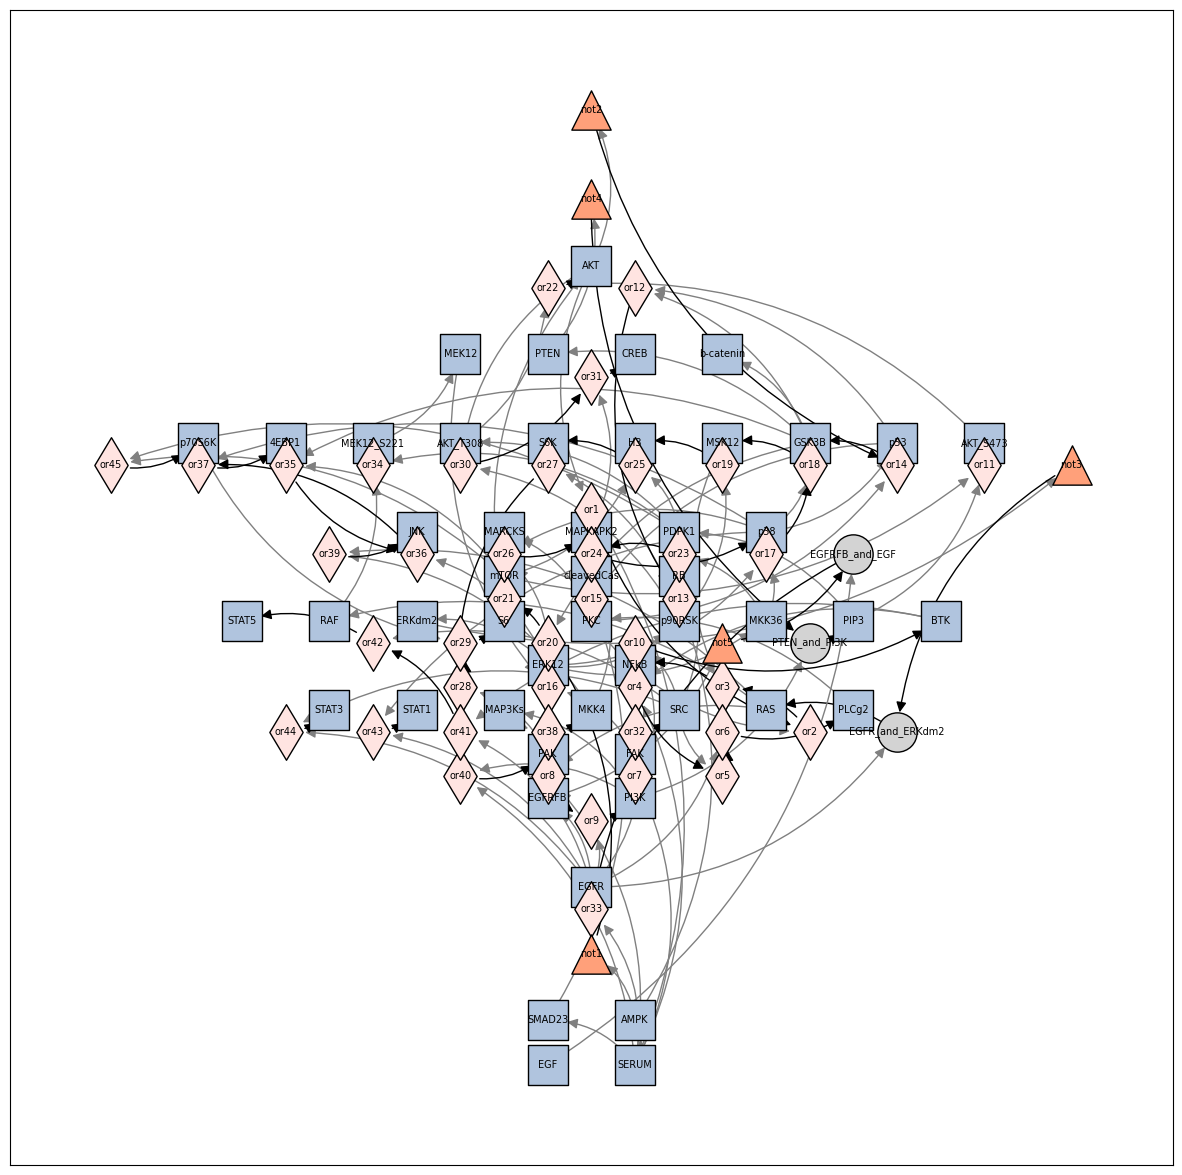

In [2]:
nodes, edges = read_sif("/dccstor/ipc1/CAR/DREAM/DREAMdata/PKN_Alice.sif")
model = BioFuzzNet(nodes, edges)
p = draw_BioFuzzNet(model)

In [3]:
for i in nx.recursive_simple_cycles(model):
    print(i)

['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or10', 'BTK', 'or4', 'or5', 'or6']
['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or5', 'or6']
['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or10', 'BTK', 'or4', 'or5', 'or6']
['FAK', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or7']
['PI3K', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9']
['PIP3', 'PDPK1', 'AKT_T308'

Leaving us with 6 loops, interestingly. With constances PKN I only have one loop...

In [4]:
model.edges

OutEdgeView([('SERUM', 'SMAD23'), ('SERUM', 'AMPK'), ('SERUM', 'or1'), ('SERUM', 'or4'), ('SERUM', 'or7'), ('SERUM', 'or8'), ('SERUM', 'or33'), ('SERUM', 'or40'), ('PLCg2', 'PKC'), ('FAK', 'or16'), ('PI3K', 'MAP3Ks'), ('PI3K', 'PTEN_and_PI3K'), ('PI3K', 'or10'), ('PI3K', 'or32'), ('PI3K', 'or40'), ('BTK', 'or4'), ('BTK', 'or41'), ('PIP3', 'PDPK1'), ('PIP3', 'or11'), ('AKT_S473', 'or22'), ('p53', 'or12'), ('p53', 'or15'), ('GSK3B', 'b-catenin'), ('GSK3B', 'PTEN'), ('GSK3B', 'or12'), ('GSK3B', 'or20'), ('GSK3B', 'or35'), ('AMPK', 'not1'), ('AMPK', 'or13'), ('SMAD23', 'or15'), ('ERK12', 'MKK36'), ('ERK12', 'ERKdm2'), ('ERK12', 'p90RSK'), ('ERK12', 'or17'), ('ERK12', 'or26'), ('ERK12', 'or36'), ('MSK12', 'or3'), ('MSK12', 'or19'), ('MKK36', 'or17'), ('MKK36', 'or23'), ('p90RSK', 'or19'), ('p90RSK', 'or27'), ('p90RSK', 'or30'), ('mTOR', 'or11'), ('mTOR', 'or25'), ('mTOR', 'or35'), ('mTOR', 'or45'), ('AKT', 'not2'), ('AKT', 'or1'), ('AKT', 'or21'), ('AKT', 'or30'), ('PKC', 'MARCKS'), ('PKC',

In [5]:
output_nodes = ["MEK12", "ERK12", "ERKdm2", "RAS", "RAF",
                  "p90RSK", "CREB", "MKK4", "JNK", "p53", "RB", 
                  "MKK36", "p38", "MAPKAPK2", "celavedCas", "H3", "SMAD23"]

subgraph_edges = {e: w for e,w in edges.items() for n in output_nodes if n in e }
subgraph_nodes = set([e[0] for e in subgraph_edges.keys()]+[e[1] for e in subgraph_edges.keys()])

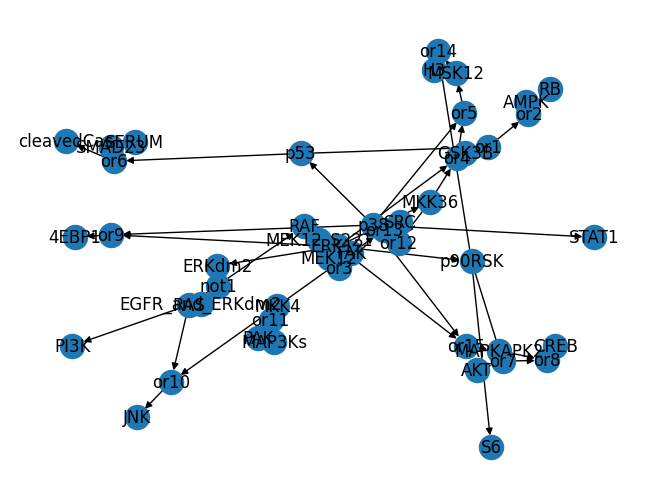

In [6]:
temp = BioFuzzNet(subgraph_nodes, subgraph_edges)
nx.draw(temp, with_labels=True)

In [7]:
temp.root_nodes

['SERUM', 'PAK', 'AKT', 'SRC', 'AMPK', 'FAK', 'MAP3Ks', 'GSK3B']

In [8]:
subgraph_edges

{('p53', 'RB'): '1',
 ('GSK3B', 'RB'): '1',
 ('AMPK', 'RB'): '1',
 ('p53', 'cleavedCas'): '1',
 ('SMAD23', 'cleavedCas'): '1',
 ('ERK12', 'MSK12'): '1',
 ('MKK36', 'MSK12'): '1',
 ('MSK12', 'H3'): '1',
 ('p90RSK', 'H3'): '1',
 ('SERUM', 'SMAD23'): '1',
 ('p38', 'MSK12'): '1',
 ('p38', 'p53'): '1',
 ('p38', 'MAPKAPK2'): '1',
 ('p90RSK', 'CREB'): '1',
 ('p90RSK', 'S6'): '1',
 ('ERK12', 'MKK36'): '1',
 ('ERK12', 'MAPKAPK2'): '1',
 ('ERK12', 'ERKdm2'): '1',
 ('RAS', 'PI3K'): '1',
 ('AKT', 'CREB'): '1',
 ('MAPKAPK2', 'CREB'): '1',
 ('RAF', 'MEK12_S221'): '1',
 ('ERK12', '4EBP1'): '1',
 ('p38', '4EBP1'): '1',
 ('ERK12', 'p90RSK'): '1',
 ('MKK4', 'JNK'): '1',
 ('ERKdm2', 'EGFR_and_ERKdm2'): '-1',
 ('EGFR_and_ERKdm2', 'RAS'): '1',
 ('RAS', 'RAF'): '1',
 ('MEK12_S221', 'MEK12'): '1',
 ('MEK12', 'ERK12'): '1',
 ('SRC', 'p38'): '1',
 ('MKK36', 'p38'): '1',
 ('MKK4', 'p38'): '1',
 ('RAS', 'JNK'): '1',
 ('FAK', 'ERK12'): '1',
 ('PAK', 'MKK4'): '1',
 ('MAP3Ks', 'MKK4'): '1',
 ('p38', 'STAT1'): '1'}

In [9]:
nx.recursive_simple_cycles(temp)

[['ERKdm2',
  'not1',
  'EGFR_and_ERKdm2',
  'RAS',
  'RAF',
  'MEK12_S221',
  'MEK12',
  'or3',
  'ERK12']]

FAK and MEK12 upstream of ERK12 OK <br>
MAP3Ks and PAK are unmeasured and upstream of MKK4, we remove MAP3Ks and PAK and use MKK4 as a root <br>
SRC in loop, but loop includes PI3K< PDPK1, PTEN, PIP3 etc... In this subnetwork the loop is ERK to RAS, which is "downstream" of SRC. <br>
AKT and GSK3B are in loops but if we take these as input the output nodes are not affected by the loop <br>

In [10]:
root_nodes = ["EGFR", "AKT", "AMPK", "MKK4", "SRC", "FAK", "MEK12", "SMAD23", "GSK3B"]
measured_output_nodes = ["ERK12",
                         "p90RSK", "CREB", "MKK4", "JNK", "p53", "RB", 
                         "MKK36", "p38", "MAPKAPK2", "H3", "SMAD23",
                         "cleavedCas"]
unmeasured_nodes = ["ERKdm2", "MSK12", "EGFR_and_ERKdm2", "EGFR", "RAS", "RAF", "MEK12_S221"]

all_nodes = root_nodes + measured_output_nodes + unmeasured_nodes
subgraph_edges = {e: w for e,w in edges.items() if ((e[0] in all_nodes) and (e[1] in all_nodes))}
# subgraph_nodes = set([e[0] for e in subgraph_edges.keys()]+[e[1] for e in subgraph_edges.keys()])

/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:223: UserWarning: Node MKK4 already exists, node was not added
  warnings.warn(f"Node {node_name} already exists, node was not added")
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:223: UserWarning: Node SMAD23 already exists, node was not added
  warnings.warn(f"Node {node_name} already exists, node was not added")
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/biofuzznet.py:223: UserWarning: Node EGFR already exists, node was not added
  warnings.warn(f"Node {node_name} already exists, node was not added")


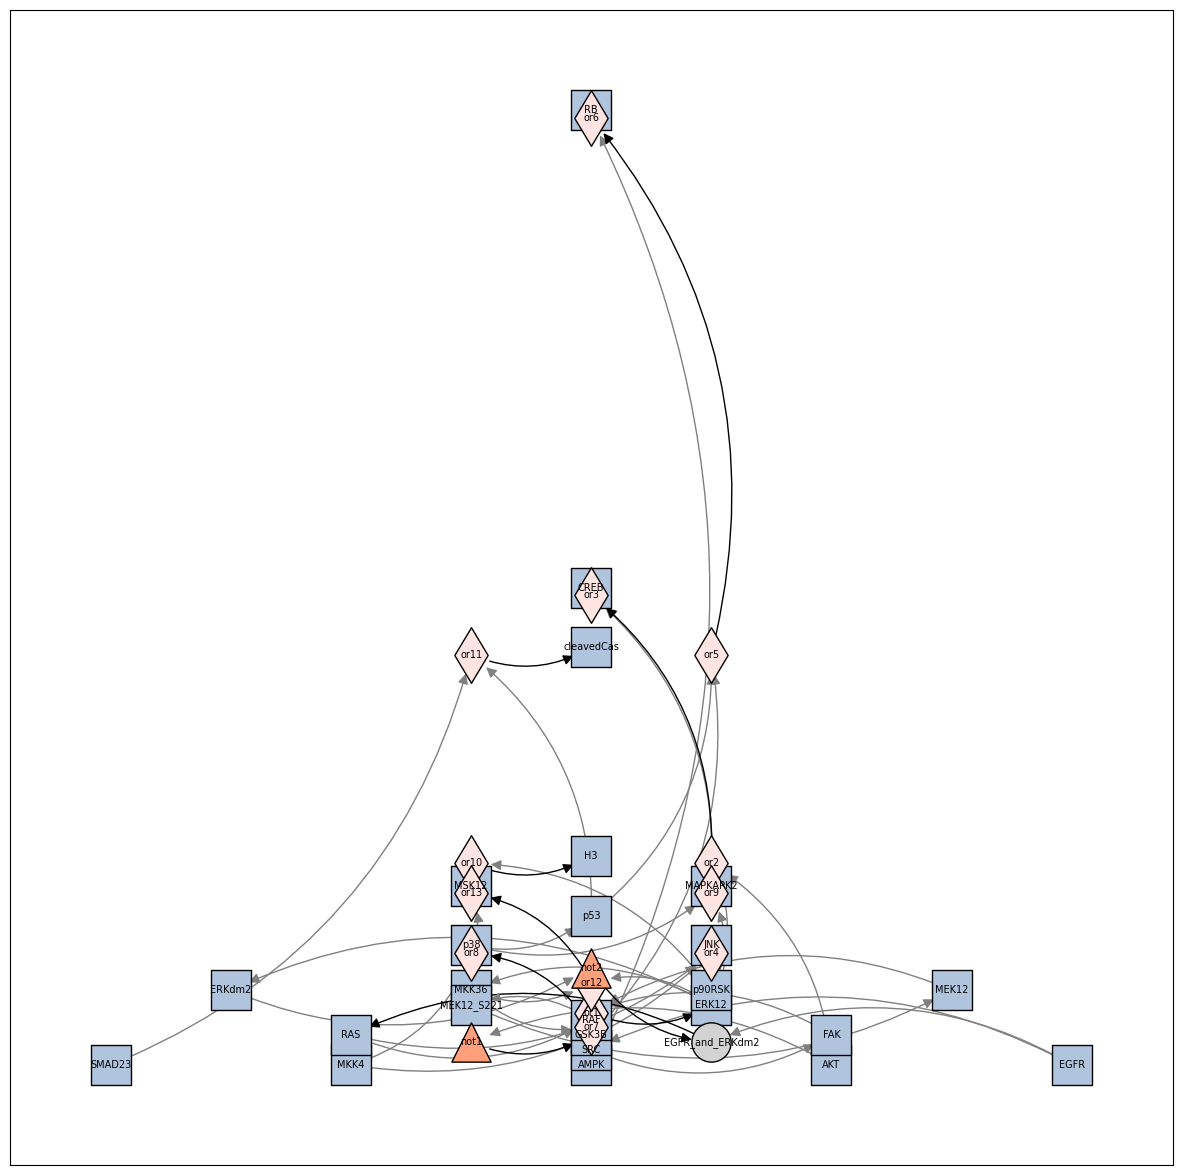

In [11]:
temp = BioFuzzNet(all_nodes, subgraph_edges)
p=draw_BioFuzzNet(temp)

In [12]:
nx.recursive_simple_cycles(temp)

[['MEK12',
  'or1',
  'ERK12',
  'ERKdm2',
  'not2',
  'EGFR_and_ERKdm2',
  'RAS',
  'RAF',
  'MEK12_S221']]

In [13]:
subgraph_edges

{('p53', 'RB'): '1',
 ('GSK3B', 'RB'): '1',
 ('AMPK', 'RB'): '1',
 ('p53', 'cleavedCas'): '1',
 ('SMAD23', 'cleavedCas'): '1',
 ('ERK12', 'MSK12'): '1',
 ('MKK36', 'MSK12'): '1',
 ('MSK12', 'H3'): '1',
 ('p90RSK', 'H3'): '1',
 ('p38', 'MSK12'): '1',
 ('p38', 'p53'): '1',
 ('p38', 'MAPKAPK2'): '1',
 ('p90RSK', 'CREB'): '1',
 ('ERK12', 'MKK36'): '1',
 ('ERK12', 'MAPKAPK2'): '1',
 ('ERK12', 'ERKdm2'): '1',
 ('AKT', 'GSK3B'): '-1',
 ('AKT', 'CREB'): '1',
 ('MAPKAPK2', 'CREB'): '1',
 ('SRC', 'FAK'): '1',
 ('RAF', 'MEK12_S221'): '1',
 ('ERK12', 'p90RSK'): '1',
 ('MKK4', 'JNK'): '1',
 ('EGFR', 'EGFR_and_ERKdm2'): '1',
 ('ERKdm2', 'EGFR_and_ERKdm2'): '-1',
 ('EGFR_and_ERKdm2', 'RAS'): '1',
 ('RAS', 'RAF'): '1',
 ('MEK12_S221', 'MEK12'): '1',
 ('MEK12', 'ERK12'): '1',
 ('SRC', 'p38'): '1',
 ('MKK36', 'p38'): '1',
 ('MKK4', 'p38'): '1',
 ('RAS', 'JNK'): '1',
 ('FAK', 'ERK12'): '1',
 ('EGFR', 'SRC'): '1'}

In [14]:
remove_nodes = ["PAK", "MAP3Ks", "S6", "4EBP1", "STAT1"] 
#(CREB if we remove Akt)
# If we remove Rb we can also omit AMPK and GS3KB

In [15]:
# OEdges that should be removed, since they are between root nodes
[e for e in subgraph_edges.keys() if e[0] in root_nodes and e[1] in root_nodes]

[('AKT', 'GSK3B'), ('SRC', 'FAK'), ('EGFR', 'SRC')]

In [16]:
len(subgraph_edges)

35

In [2]:
nodes, edges = read_sif("/dccstor/ipc1/CAR/DREAM/DREAMdata/PKN_subnetwork.sif")

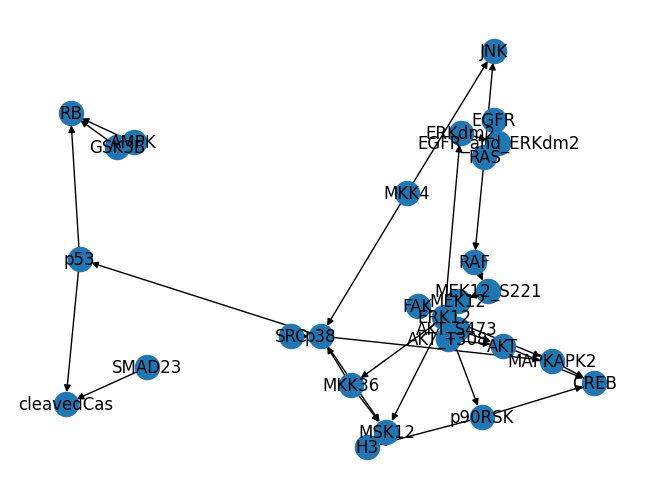

In [7]:
t = nx.DiGraph()
t.add_edges_from(edges)
nx.draw(t, with_labels=True)

In [8]:
nx.write_gexf(t, "/dccstor/ipc1/CAR/DREAM/DREAMdata/PKN_subnetwork.gexf")

In [4]:
model.root_nodes

NameError: name 'model' is not defined

In [5]:
for i in nx. recursive_simple_cycles(t):
    print(i)

['ERK12', 'ERKdm2', 'EGFR_and_ERKdm2', 'RAS', 'RAF', 'MEK12_S221', 'MEK12']


In [6]:
7*3

21